<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [81]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

The numpy library is used to handle matrixes.

sklearn.svm is used for the SVC the SVM classfiers.

sklearn.model_selection is used for gird search.

matplot is used for the plots.

In [82]:
mnistsub = np.genfromtxt('mnistsub.csv', delimiter=',') # Read the mnistsub.csv file.
mnistsubX = mnistsub[:, :2]          # Read all Y-values, and add to np-array.
mnistsubY = mnistsub[:, 2]           # Read all X-values, and add to np-array.

# Spliting up to training data.
np.random.shuffle(mnistsub)          # Shuffle rows in mnistsub
xTrain, xTest, yTrain, yTest = train_test_split(mnistsubX, mnistsubY, test_size=1/4, random_state=45)    # Training data should be 75 % of the data.

The needed datas are set here. The mnistsub.csv file is read using np.genfromtx.

The data is randomnized and then split into X-features and Y-labels.

The 75 % of the data is then added to the training set and 25 to test set.

<b> Exercise 1: Various kernels </b>

In [83]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#000000']) # mesh plot
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#555353']) # colors

parameters = [0.1,1, 10, 100, 1000] # The values that are going to be checked.

#Setting up the parameters to the SVC.
svcParameters = [{'kernel':['linear'],'C':parameters},
                  {'kernel':['rbf'], 'C':parameters,'gamma':parameters},
                  {'kernel':['poly'], 'C':parameters,'degree':[2,3,4,5,6]}]

<b> Exercise 1.1: Tune the necessary hyperparameters by for instance grid search.

Exercise 1.2: Produce a plot of the decision boundary for the best models together with the data. </b>

Grid Search SVC: {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}
Best paramrs: {'C': 10, 'kernel': 'linear'},
Best Score: 0.8140476190476189



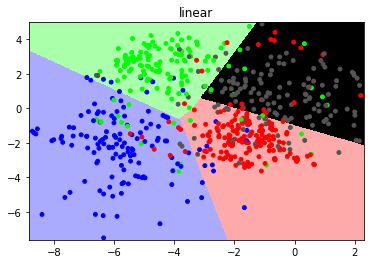

Grid Search SVC: {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10, 100, 1000]}
Best paramrs: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
Best Score: 0.8241596638655462



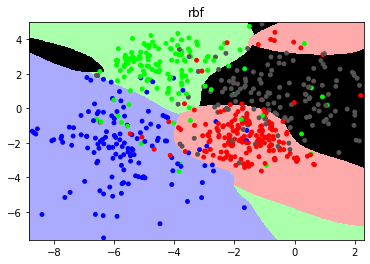

Grid Search SVC: {'kernel': ['poly'], 'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4, 5, 6]}
Best paramrs: {'C': 100, 'degree': 3, 'kernel': 'poly'},
Best Score: 0.7772689075630252



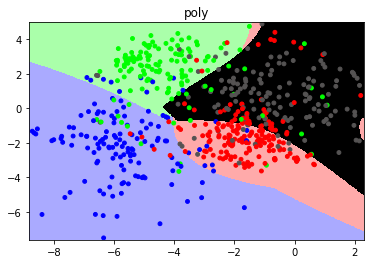

In [84]:
for p in svcParameters:
    print("Grid Search SVC:",p)
    gridSearchCV = GridSearchCV(SVC(), p, cv = 5,n_jobs=-1)    # Prepare grid search for current SVC parameter.
    gridSearchCV.fit(xTrain,yTrain)                                        # Run gird search.
    bestScore = abs(gridSearchCV.best_score_)                              # Check for best score.
    bestParams = gridSearchCV.best_params_                                 # Check for best params.
    print("Best paramrs: "+str(bestParams)+",\nBest Score: " +str(bestScore)+"\n")

    # Exercise 1.2: Produce a plot of the decision boundary for the best models together with the data.
    if bestParams["kernel"] == 'linear':        # Check which model and set model params.
        clf = SVC(kernel = str(bestParams["kernel"]),C = bestParams["C"])   # Linear
    elif bestParams["kernel"] == 'rbf':
        clf = SVC(kernel = str(bestParams["kernel"]),C = bestParams["C"], gamma = bestParams["gamma"])  # Rbf
    else:
        clf = SVC(kernel = str(bestParams["kernel"]),C = bestParams["C"], degree = bestParams["degree"])    # Poly

    clf.fit(xTrain, yTrain)
    #computing the decision boundary
    X1 = xTrain[:,0]
    X2 = xTrain[:,1]
    h = .02 # step size in the mesh
    x_min, x_max = X1.min()-0.1, X1.max()+0.1
    y_min, y_max = X2.min()-0.1, X2.max()+0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)) # Mesh Grid
    x1,x2 = xx.ravel(), yy.ravel() # Turn to two Nx1 arrays
    xy_mesh = np.c_[x1, x2] # Turn to Nx2 matrix
    clzmesh = clf.predict(xy_mesh)
    clzmesh = clzmesh.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.pcolormesh(xx, yy, clzmesh,linewidth=5,cmap=cmap_light, shading='auto')
    ax.scatter(xTrain[:, 0], xTrain[:, 1], c=yTrain, cmap=cmap_bold, s =15)
    ax.set_title(str(bestParams["kernel"]))
    plt.show()

Parameters are tuned using grid search. 

The paramas are searched using [0.1,1, 10, 100, 1000] for C,

and [2,3,4,5,6] for degrees. Degree 1 is igonres since it is always accurate.

We can see that a lower hyperparameter for the penatly factor C is preferable for rbf and linear. 

For the polynominal kernels degree 3 is preferable and a higher C is often preferable.

<b> Test set scores </b>

In [85]:
for p in svcParameters:
    print("Grid Search SVC:",p)
    gridSearchCV = GridSearchCV(SVC(), p, cv = 5,n_jobs=-1)                 # Prepare grid search for current SVC parameter.
    gridSearchCV.fit(xTest,yTest)                                           # Run gird search.
    bestScore = abs(gridSearchCV.best_score_)                              # Check for best score.
    bestParams = gridSearchCV.best_params_                                 # Check for best params.
    print("Best params: "+str(bestParams)+",\nBest Score: " +str(bestScore)+"\n")

Grid Search SVC: {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}
Best paramrs: {'C': 1, 'kernel': 'linear'},
Best Score: 0.813846153846154

Grid Search SVC: {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 10, 100, 1000]}
Best paramrs: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
Best Score: 0.8088461538461539

Grid Search SVC: {'kernel': ['poly'], 'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4, 5, 6]}
Best paramrs: {'C': 10, 'degree': 2, 'kernel': 'poly'},
Best Score: 0.7639743589743591



We can se that the training set has an avarge accuracy of 80 %

While the test set has an accuracy of 75 %. 

This tells us a the classfiers works well for both test and training set.